In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital gain,capital_loss,hours_per_week,country,outcome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


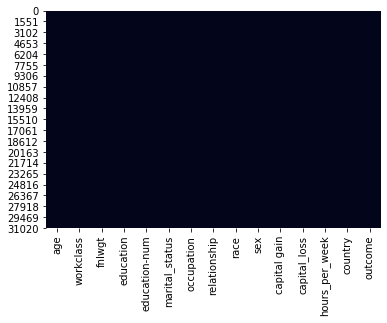

In [4]:
sns.heatmap(df.isna(),cbar=False)

In [5]:
df[df.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital gain,capital_loss,hours_per_week,country,outcome


# Looks like no missing values

# Quick Univariate analysis

In [6]:
df.describe()

,age,fnlwgt,education-num,capital gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#capital gain of 99999 looks like outlier

#capital loss max value looking like outlier

#max value of Hours per week looks like outlier
#min value of Hours per week looks interesting
#Explore hours_per_week less than 25 and more than 75
#std deviation is also high suggests diff. category of employement

#Max age 90, might be some interesting 

#fnlwgt is the representation of that particular row in whole census

#Education num is proxy of education column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
country           32561 non-null object
outcome           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


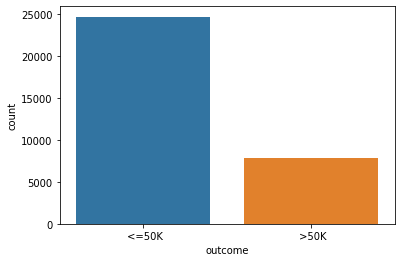

In [9]:
sns.countplot(df['outcome'])

# Class Imbalance problem

# Exploring continuous data

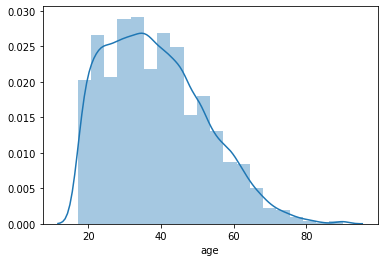

In [10]:
sns.distplot(df["age"],bins=20)

In [11]:
#Righlty skewed histogram 
#since representation of older is smaller, it would be intresting to see how model predicts older population 

In [12]:
#integer encoding outcome variable

from sklearn import preprocessing

label=preprocessing.LabelEncoder()

df['outcome']=label.fit_transform(df['outcome'])

df.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital gain,capital_loss,hours_per_week,country,outcome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [13]:
# <=50K is 0
#drop education_num column, its proxy already present

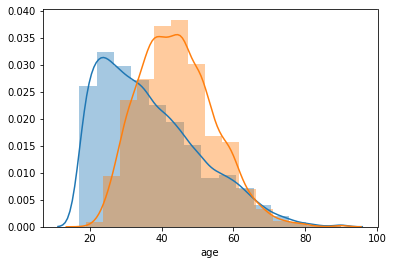

In [14]:
#Looking age across outcome

sns.distplot(df[df['outcome']==0]['age'],bins=15)
sns.distplot(df[df['outcome']==1]['age'],bins=15)

In [15]:
#Income across age is not monotonically increasing 
#Income label 1 with age around 20 are special cases and label 0 at age 80 belongs to special job category
#explore above

# Exploring Hours_per_week

(array([  943.,  3000.,  3306., 18850.,  5372.,   666.,   280.,   144.]),
 array([ 1.  , 13.25, 25.5 , 37.75, 50.  , 62.25, 74.5 , 86.75, 99.  ]),
 <a list of 8 Patch objects>)

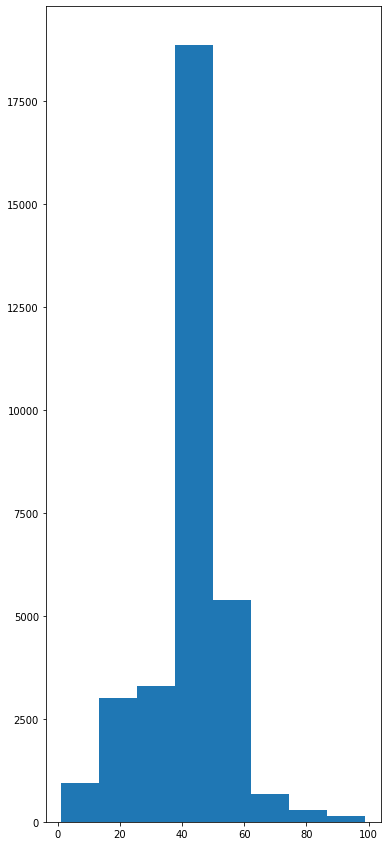

In [16]:
plt.figure(figsize=(6,15))
plt.hist(df["hours_per_week"],bins=8)

In [17]:
#0-20 should correspond to unemployed or old age/retired people
#80-100 occupation is worth exploring,their age group and capital gain and loss

(array([  33.,   48.,  114.,   69.,  121., 3600.,  903., 1506.,  395.,
         768.,  139.,   25.,   78.,   11.,   31.]),
 array([ 1.        ,  7.53333333, 14.06666667, 20.6       , 27.13333333,
        33.66666667, 40.2       , 46.73333333, 53.26666667, 59.8       ,
        66.33333333, 72.86666667, 79.4       , 85.93333333, 92.46666667,
        99.        ]),
 <a list of 15 Patch objects>)

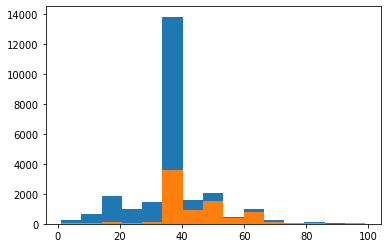

In [18]:
#Looking hours_per_week across outcome

plt.hist(df[df['outcome']==0]['hours_per_week'],bins=15)
plt.hist(df[df['outcome']==1]['hours_per_week'],bins=15)

In [19]:
#people earning more are working for longer hours
#people earning more but working less are worth exploring might be special occupation
#people earning less working for 80-100 hours might be working in underprivilage occupation
#create a occupation bin with mennial,average,cool job 
#give a look across age and country too too
#basically study these individualwhich are not following trend

# capital gain

(array([3.1791e+04, 5.1700e+02, 8.7000e+01, 5.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <a list of 10 Patch objects>)

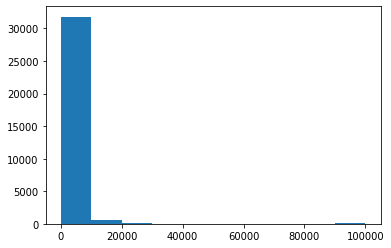

In [20]:
plt.hist(df["capital gain"],bins=10)

In [21]:
#capital gain in last bucket is defintely a special case
#look for country,race and occupation for capital gain distribution
#expecting a white employed to be heavily in non zero capital gain
#Create a feature for captial gain, explore features which are dominant in feature non zero capital gain
# expecting white,educated,employed,europeans and north americans to be dominant

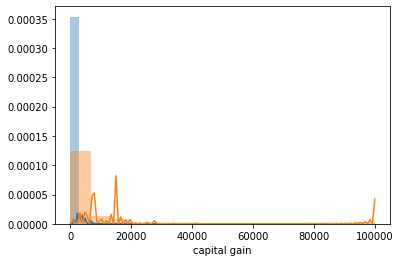

In [22]:
#Looking hours_per_week across outcome

sns.distplot(df[df['outcome']==0]['capital gain'],bins=15)
sns.distplot(df[df['outcome']==1]['capital gain'],bins=15)

In [23]:
#expected! label==1 is lesser in capital gain==0
#explain this capital gain feature using race,nationality,employement not expecting age and marital status playing a role 

# capital loss

(array([3.1053e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <a list of 10 Patch objects>)

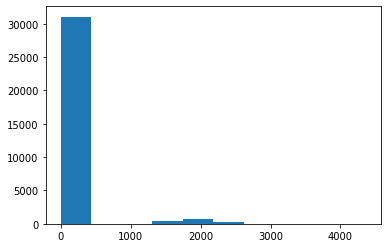

In [24]:
plt.hist(df["capital_loss"],bins=10)

In [25]:
#High loss might correlate with higher income coz they only afford
#gamler feature can be classifiedusin
#explore bin 4,5,6
#not expecting much info out of it 
#try using ANOVA as it is the case of continuous and categorical variable

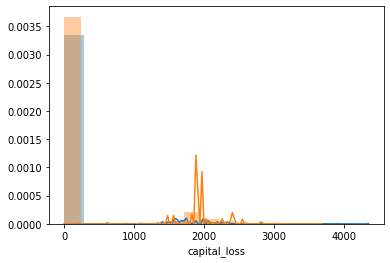

In [26]:
#Looking hours_per_week across outcome

sns.distplot(df[df['outcome']==0]['capital_loss'],bins=15)
sns.distplot(df[df['outcome']==1]['capital_loss'],bins=15)

In [27]:
#label 1 is in high capital loss , more oney more risk
#Label 1 is also leading in zero capital loss
#shrewedness can be classified
#but firstc check how much information this variable has


# Fnlwgt 

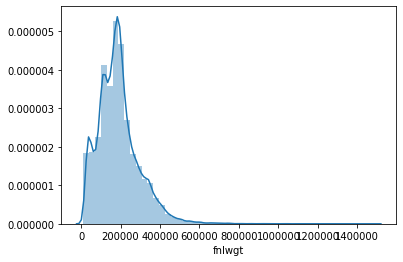

In [28]:
sns.distplot(df['fnlwgt'])

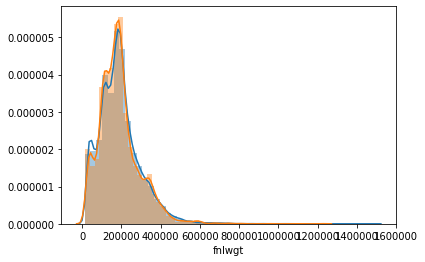

In [29]:
sns.distplot(df[df['outcome']==0]['fnlwgt'])
sns.distplot(df[df['outcome']==1]['fnlwgt'])

# Exploring Categorical Variable

In [30]:
cat_var=df.select_dtypes('object').columns
cat_var

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country'],
      dtype='object')

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
others               1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

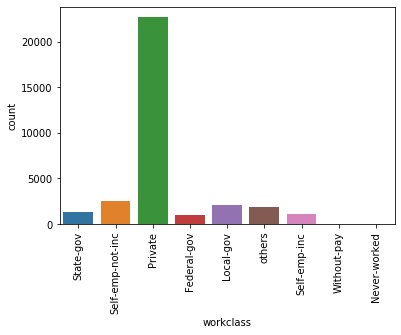

In [31]:
cat=0
#correcting for '?'
df['workclass'].replace([' ?'],'others',inplace=True)

#Removing Trailing and Leading spaces
df[cat_var[cat]]=df[cat_var[cat]].apply(lambda x: x.strip())

p=sns.countplot(df[cat_var[cat]])
_ = plt.setp(p.get_xticklabels(), rotation=90) 

df[cat_var[cat]].value_counts()


#Club all gov,self-emp,private seprately
#explore ?,without-pay and never-worked

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,others
outcome,,,,,,,,,
0,0.613542,0.705208,1.0,0.781327,0.442652,0.715073,0.728043,1.0,0.895969
1,0.386458,0.294792,0.0,0.218673,0.557348,0.284927,0.271957,0.0,0.104031


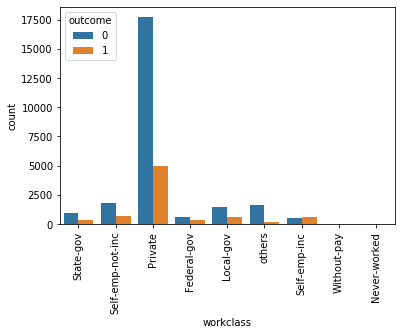

In [32]:
p=sns.countplot(df[cat_var[cat]],hue=df['outcome'])
_ = plt.setp(p.get_xticklabels(), rotation=90) 


pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns')

#Self-emp-inc is dominated by label=1 unloke other workclass

In [33]:
#Binning "Workclass" columns
df["bin_workclass"]=df["workclass"]
df["bin_workclass"]=df["bin_workclass"].replace(["Local-gov","State-gov","Federal-gov"],"gov")
df["bin_workclass"]=df["bin_workclass"].replace(["Never-worked","Without-pay","others"],"others")
pd.crosstab(df["outcome"],df["bin_workclass"],normalize="columns").transpose()

outcome,0,1
bin_workclass,,
Private,0.781327,0.218673
Self-emp-inc,0.442652,0.557348
Self-emp-not-inc,0.715073,0.284927
gov,0.691795,0.308205
others,0.897146,0.102854


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

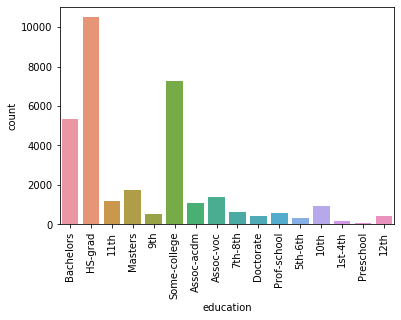

In [34]:
cat=1

#Removing Trailing and Leading spaces
df[cat_var[cat]]=df[cat_var[cat]].apply(lambda x: x.strip())


p=sns.countplot(df[cat_var[cat]])
_ = plt.setp(p.get_xticklabels(), rotation=90) 

df[cat_var[cat]].value_counts()


#Surprisingly most are HS Grad
# Expecting HS Grad with Private to be under <=50

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
outcome,,,,,,,,,,,,,,,,
0,0.933548,0.948936,0.923788,0.964286,0.951952,0.93808,0.947471,0.75164,0.738784,0.585247,0.25908,0.840491,0.443413,1.0,0.265625,0.809765
1,0.066452,0.051064,0.076212,0.035714,0.048048,0.06192,0.052529,0.24836,0.261216,0.414753,0.74092,0.159509,0.556587,0.0,0.734375,0.190235


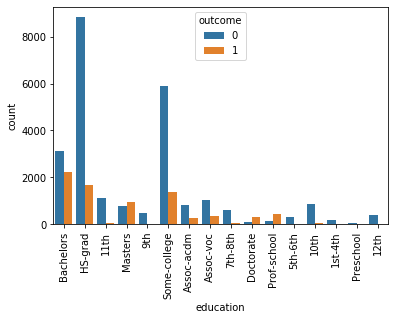

In [35]:
p=sns.countplot(df[cat_var[cat]],hue=df['outcome'])
_ = plt.setp(p.get_xticklabels(), rotation=90) 


pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns')

#Label=1 is siginificant in married
#try making single and in-active relation
#try looking age and workclass and education for above category

In [36]:
#Binning "education" columns
df["bin_education"]=df["education"]
df["bin_education"]=df["bin_education"].replace(["10th","11th","12th","1st-4th","5th-6th","7th-8th","9th","Preschool"],"School")
df["bin_education"]=df["bin_education"].replace(["Assoc-acdm","Assoc-voc","HS-grad","Some-college"],"Assoc")
df["bin_education"]=df["bin_education"].replace(["Bachelors","Masters"],"BnM")
df["bin_education"]=df["bin_education"].replace(["Doctorate","Prof-school"],"Prof.")
pd.crosstab(df["outcome"],df["bin_education"],normalize="columns").transpose()

outcome,0,1
bin_education,,
Assoc,0.817796,0.182204
BnM,0.550721,0.449279
Prof.,0.262892,0.737108
School,0.942629,0.057371


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

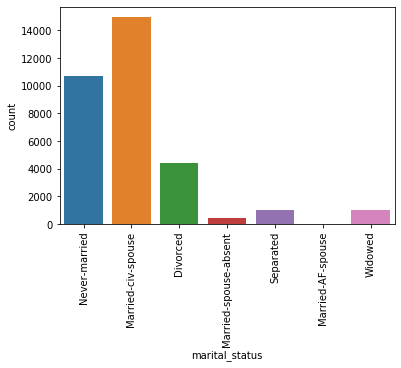

In [37]:
cat=2

#Removing Trailing and Leading spaces
df[cat_var[cat]]=df[cat_var[cat]].apply(lambda x: x.strip())

p=sns.countplot(df[cat_var[cat]])
_ = plt.setp(p.get_xticklabels(), rotation=90) 

df[cat_var[cat]].value_counts()


marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
outcome,,,,,,,
0,0.895791,0.565217,0.553152,0.91866,0.954039,0.93561,0.914401
1,0.104209,0.434783,0.446848,0.08134,0.045961,0.06439,0.085599


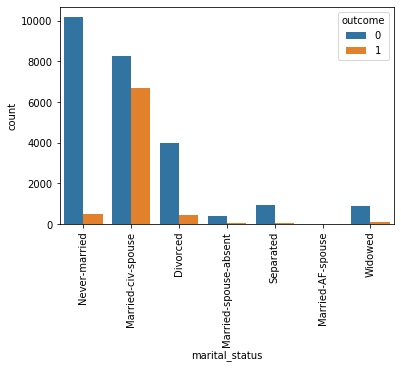

In [38]:
p=sns.countplot(df[cat_var[cat]],hue=df['outcome'])
_ = plt.setp(p.get_xticklabels(), rotation=90) 


pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns')

#Label=1 is siginificant in married
#try making single and in-active relation
#try looking age and workclass and education for above category

In [39]:
df["bin_marital_status"]=df["marital_status"]
df["bin_marital_status"]=df["bin_marital_status"].replace(["Married-spouse-absent","Never-married","Separated","Widowed","Divorced"],"Unhappy")
df["bin_marital_status"]=df["bin_marital_status"].replace(["Married-AF-spouse","Married-civ-spouse"],"happy")
pd.crosstab(df["outcome"],df["bin_marital_status"],normalize="columns").transpose()

outcome,0,1
bin_marital_status,,
Unhappy,0.935144,0.064856
happy,0.553170,0.446830


Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
others               1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

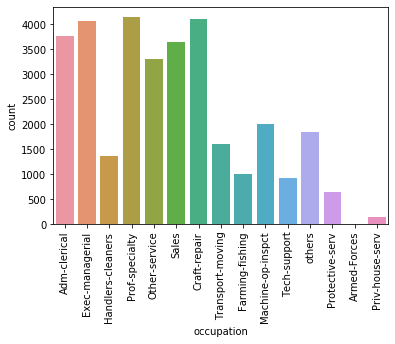

In [40]:
cat=3
#correcting for '?'
df['occupation'].replace([' ?'],'others',inplace=True)

#Removing Trailing and Leading spaces
df[cat_var[cat]]=df[cat_var[cat]].apply(lambda x: x.strip())

p=sns.countplot(df[cat_var[cat]])
_ = plt.setp(p.get_xticklabels(), rotation=90) 

df[cat_var[cat]].value_counts()

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,others
outcome,,,,,,,,,,,,,,,
0,0.865517,0.888889,0.773359,0.515986,0.884306,0.937226,0.875125,0.958422,0.993289,0.550966,0.674884,0.730685,0.695043,0.799624,0.896365
1,0.134483,0.111111,0.226641,0.484014,0.115694,0.062774,0.124875,0.041578,0.006711,0.449034,0.325116,0.269315,0.304957,0.200376,0.103635


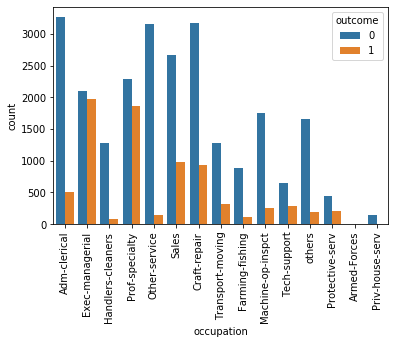

In [41]:
p=sns.countplot(df[cat_var[cat]],hue=df['outcome'])
_ = plt.setp(p.get_xticklabels(), rotation=90) 


pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns')

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital gain,capital_loss,hours_per_week,country,outcome,bin_workclass,bin_education,bin_marital_status,occupation_flag
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,gov,BnM,Unhappy,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,Self-emp-not-inc,BnM,happy,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,Private,Assoc,Unhappy,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,Private,School,happy,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,Private,BnM,happy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,Private,Assoc,happy,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,Private,Assoc,happy,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,Private,Assoc,Unhappy,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,Private,Assoc,Unhappy,0


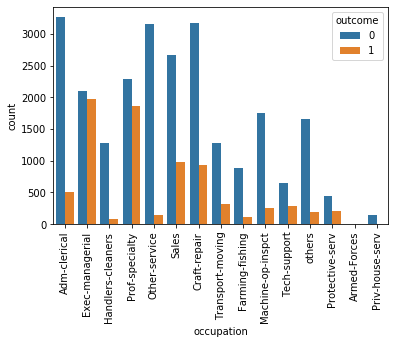

In [42]:
cat=3
p=sns.countplot(df[cat_var[cat]],hue=df['outcome'])
_ = plt.setp(p.get_xticklabels(), rotation=90) 


a=pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns').transpose()
a["0/1"]=a[0]/a[1]
a["occupation_flag"]=0
a.loc[a[0]<.75,"occupation_flag"]=1
df["occupation_flag"]=df["occupation"].map(a["occupation_flag"])
df

In [43]:
#More the reputed occupation more is the money
#reputed occupation with less money might mean less experience(age) or less qualification
#Try making feature using above insight

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

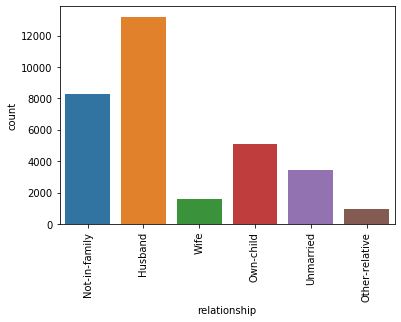

In [44]:
cat=4

#Removing Trailing and Leading spaces
df[cat_var[cat]]=df[cat_var[cat]].apply(lambda x: x.strip())

p=sns.countplot(df[cat_var[cat]])
_ = plt.setp(p.get_xticklabels(), rotation=90) 

df[cat_var[cat]].value_counts()

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
outcome,,,,,,
0,0.551429,0.89693,0.962283,0.98678,0.936738,0.524872
1,0.448571,0.10307,0.037717,0.01322,0.063262,0.475128


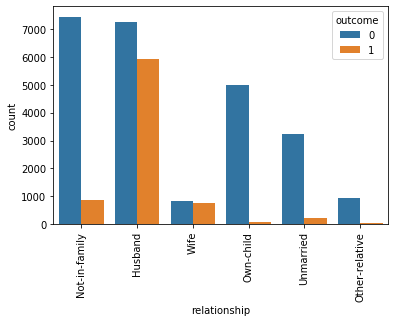

In [45]:
p=sns.countplot(df[cat_var[cat]],hue=df['outcome'])
_ = plt.setp(p.get_xticklabels(), rotation=90) 


pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns')

In [46]:
df["realtionship_bin"]=df["relationship"]
df["realtionship_bin"]=df["realtionship_bin"].replace(["Husband","Wife"],"HnW")
df["realtionship_bin"]=df["realtionship_bin"].replace(["Not-in-family","Other-relative","Own-child","Unmarried"],"not_HnW")

In [47]:
#Club Husband and wife
#create a feature 'HappyMarried' in combination with relationship and Marital status

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

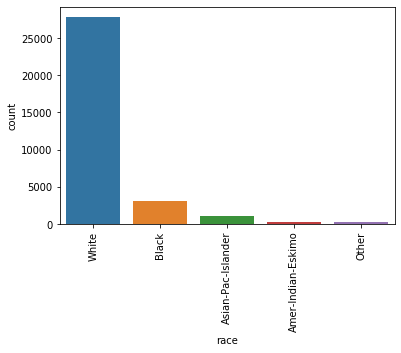

In [48]:
cat=5

#Removing Trailing and Leading spaces
df[cat_var[cat]]=df[cat_var[cat]].apply(lambda x: x.strip())

p=sns.countplot(df[cat_var[cat]])
_ = plt.setp(p.get_xticklabels(), rotation=90) 

df[cat_var[cat]].value_counts()

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
outcome,,,,,
0,0.884244,0.73436,0.87612,0.907749,0.74414
1,0.115756,0.26564,0.12388,0.092251,0.25586


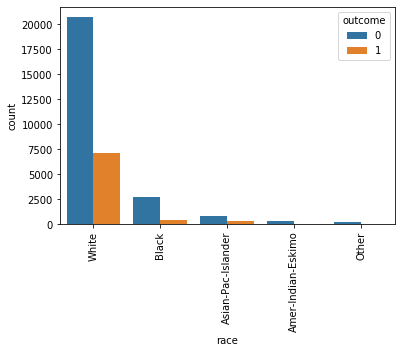

In [49]:
p=sns.countplot(df[cat_var[cat]],hue=df['outcome'])
_ = plt.setp(p.get_xticklabels(), rotation=90) 


pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns')

In [50]:
#Binning "Race" columns
df["bin_race"]=df["race"]
df["bin_race"]=df["bin_race"].replace("Asian-Pac-Islander","Asian")
df["bin_race"]=df["bin_race"].replace(["Other","Amer-Indian-Eskimo"],"others")
pd.crosstab(df["outcome"],df["bin_race"],normalize="columns").transpose()

outcome,0,1
bin_race,,
Asian,0.734360,0.265640
Black,0.876120,0.123880
White,0.744140,0.255860
others,0.895189,0.104811


In [51]:
#Make Feature White Black and other
#Check Race vs 'Happy Married' , for understanding of data only

Male      21790
Female    10771
Name: sex, dtype: int64

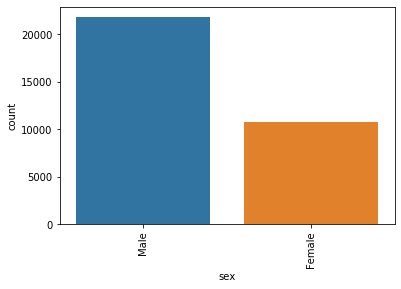

In [52]:
cat=6

#Removing Trailing and Leading spaces
df[cat_var[cat]]=df[cat_var[cat]].apply(lambda x: x.strip())

p=sns.countplot(df[cat_var[cat]])
_ = plt.setp(p.get_xticklabels(), rotation=90) 

df[cat_var[cat]].value_counts()

sex,Female,Male
outcome,,
0,0.890539,0.694263
1,0.109461,0.305737


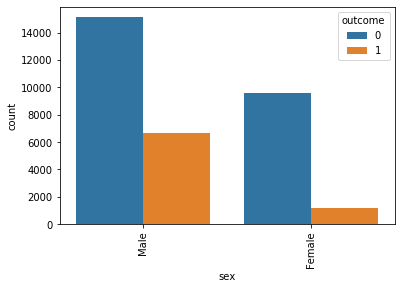

In [53]:
p=sns.countplot(df[cat_var[cat]],hue=df['outcome'])
_ = plt.setp(p.get_xticklabels(), rotation=90) 


pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns')

In [54]:
#Explore them along workclass,education and 'happymarried'

United-States                 29170
Mexico                          643
others                          583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

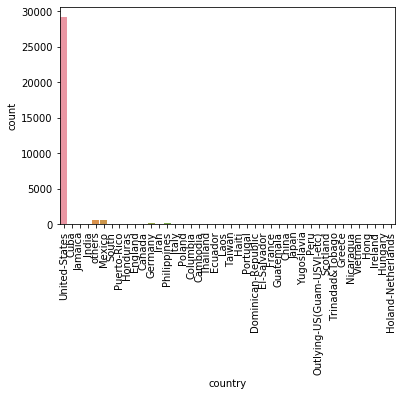

In [55]:
cat=7

#Removing Trailing and Leading spaces
df[cat_var[cat]]=df[cat_var[cat]].apply(lambda x: x.strip())

#correcting for '?'
df['country'].replace(['?'],'others',inplace=True)



p=sns.countplot(df[cat_var[cat]])
_ = plt.setp(p.get_xticklabels(), rotation=90) 

df[cat_var[cat]].value_counts()

outcome,0,1,0/1
country,,,
Cambodia,0.631579,0.368421,1.714286
Canada,0.677686,0.322314,2.102564
China,0.733333,0.266667,2.750000
Columbia,0.966102,0.033898,28.500000
Cuba,0.736842,0.263158,2.800000
Dominican-Republic,0.971429,0.028571,34.000000
Ecuador,0.857143,0.142857,6.000000
El-Salvador,0.915094,0.084906,10.777778
England,0.666667,0.333333,2.000000


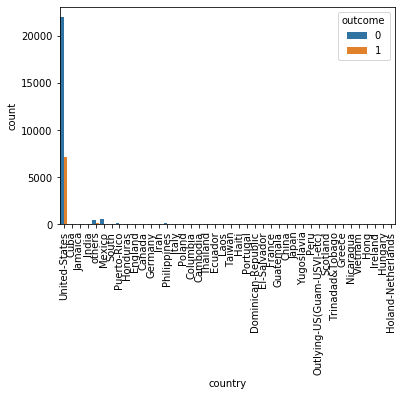

In [56]:
p=sns.countplot(df[cat_var[cat]],hue=df['outcome'])
_ = plt.setp(p.get_xticklabels(), rotation=90) 


a=pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns').transpose()
a['0/1']=a[0]/a[1]
a
#Cuba,Dominican Republican,Elsalvador,Guatemala,Haiti,Honduras,Jamaica,mexico,Nicaragua,peru,TndT,vietnam
#Check workclass for above countryz
#Check workclass for asian and europeans countryz

In [57]:
#Nativeness and workclass basis classify as illegal immigrant,legal immigrant,native
#Native Blue Collar ,Native White Collar and same for asian,europeans, and nearby north american countries

#Age occupation eduaction


#Married ,relationship status

In [58]:
#Hypothesis

#Particular country dominates in particular profession and workforce 

In [59]:
pd.set_option('display.max_rows', 5000)
pd.crosstab(df['outcome'],[df['country'],df['workclass']]).transpose()

outcome                                          0     1
country                    workclass                    
Cambodia                   Federal-gov           1     0
                           Private              10     6
                           Self-emp-not-inc      0     1
                           others                1     0
Canada                     Federal-gov           1     1
                           Local-gov             4     2
                           Private              55    24
                           Self-emp-inc          3     3
                           Self-emp-not-inc      6     5
                           State-gov             2     1
                           others               11     3
China                      Federal-gov           0     1
                           Local-gov             2     1
                           Private              37    12
                           Self-emp-inc          1     0
                           Self-emp-not-inc      1     4
                           State-gov             7     2
                           others                7     0
Columbia                   Federal-gov           2     0
                           Private              45     1
                           Self-emp-not-inc      7     0
                           State-gov             0     1
                           others                3     0
Cuba                       Federal-gov           1     1
                           Local-gov             3     1
                           Private              54    15
                           Self-emp-inc          3     6
                           Self-emp-not-inc      6     2
                           others                3     0
Dominican-Republic         Local-gov             3     0
                           Private              60     0
                           Self-emp-inc          2     0
                           Self-emp-not-inc      0     2
                           others                3     0
Ecuador                    Local-gov             1     0
                           Private              22     3
                           Self-emp-not-inc      0     1
                           others                1     0
El-Salvador                Federal-gov           1     1
                           Local-gov             5     0
                           Private              82     6
                           Self-emp-inc          0     1
                           Self-emp-not-inc      3     1
                           others                6     0
England                    Federal-gov           2     2
                           Local-gov             2     3
                           Private              44    19
                           Self-emp-inc          0     2
                           Self-emp-not-inc      6     3
                           State-gov             2     1
                           others                4     0
France                     Federal-gov           0     1
                           Local-gov             1     2
                           Private              12     7
                           Self-emp-inc          0     1
                           Self-emp-not-inc      2     0
                           State-gov             0     1
                           others                2     0
Germany                    Federal-gov           1     4
                           Local-gov             7     2
                           Private              65    32
                           Self-emp-inc          4     2
                           Self-emp-not-inc      4     2
                           State-gov             3     2
                           others                9     0
Greece                     Local-gov             1     0
                           Private              14     4
                           Self-emp-inc          1     2
          

In [60]:
#Columbia,Cuba,Dominican Republican,Elsalvador,Guatemala,Haiti,Honduras,Jamaica,mexico,Nicaragua,peru,TndT,vietnam
#Columbia Private 45/59
#cuba private 54/95
#Dominican Republican Private 60/73
#Elsalvador 82/106
#Guatemala 58/64
#Haiti 31/44
#same for jamaica

#Maxico Private employee 535/553

#In Private, Iran,japan,Taiwan have bettter ratio than anyone else

In [61]:
pd.set_option('display.max_rows', 5000)
pd.crosstab(df['outcome'],[df['country'],df['occupation']]).transpose()

outcome                                          0     1
country                    occupation                   
Cambodia                   Craft-repair          4     2
                           Exec-managerial       1     0
                           Farming-fishing       0     1
                           Machine-op-inspct     3     1
                           Other-service         1     0
                           Prof-specialty        1     2
                           Sales                 1     1
                           others                1     0
Canada                     Adm-clerical          9     3
                           Craft-repair         12     3
                           Exec-managerial       5     8
                           Farming-fishing       2     0
                           Handlers-cleaners     1     1
                           Machine-op-inspct     4     1
                           Other-service        11     1
                           Prof-specialty       16     8
                           Protective-serv       2     0
                           Sales                 3     6
                           Tech-support          1     2
                           Transport-moving      5     3
                           others               11     3
China                      Adm-clerical          1     1
                           Craft-repair          3     0
                           Exec-managerial       4     6
                           Machine-op-inspct     8     0
                           Other-service        16     0
                           Prof-specialty       11    11
                           Sales                 4     1
                           Tech-support          1     1
                           others                7     0
Columbia                   Adm-clerical          8     0
                           Craft-repair          9     0
                           Exec-managerial       4     0
                           Handlers-cleaners     3     0
                           Machine-op-inspct    10     0
                           Other-service         8     0
                           Priv-house-serv       1     0
                           Prof-specialty        4     1
                           Sales                 3     0
                           Tech-support          2     1
                           Transport-moving      2     0
                           others                3     0
Cuba                       Adm-clerical          9     3
                           Craft-repair          6     1
                           Exec-managerial       9     7
                           Farming-fishing       2     0
                           Handlers-cleaners     2     1
                           Machine-op-inspct     4     2
                           Other-service        12     1
                           Priv-house-serv       2     0
                           Prof-specialty        5     6
                           Protective-serv       2     0
                           Sales                 7     3
                           Transport-moving      7     1
                           others                3     0
Dominican-Republic         Adm-clerical          4     0
                           Craft-repair          6     0
                           Exec-managerial       2     0
                           Handlers-cleaners     5     0
                           Machine-op-inspct    22     0
                           Other-service        12     0
                           Priv-house-serv       1     0
                           Prof-specialty        2     1
                           Protective-serv       1     0
                           Sales                 7     1
                           Transport-moving      3     0
                           others                3     0
Ecuador                    Adm-clerical          1     0
          

In [62]:
#Do Data preprocessing fully:-
#Remove '?' done
#Correct for column names(front space) done
#create new columns by binning
#then start Bi-Variate analysis

In [63]:
df.groupby(['country','outcome'])['age'].agg({'mean':'mean','count':'count','Max':'max','Min':'min','Median':'median'})

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


mean  count  Max  Min  Median
country                    outcome                                    
Cambodia                   0        35.666667     12   65   18    34.5
                           1        41.428571      7   50   27    42.0
Canada                     0        41.012195     82   80   17    38.0
                           1        45.769231     39   76   30    45.0
China                      0        41.800000     55   75   22    40.0
                           1        44.550000     20   69   29    43.0
Columbia                   0        39.228070     57   75   18    36.0
                           1        53.500000      2   64   43    53.5
Cuba                       0        47.285714     70   82   21    47.0
                           1        41.520000     25   67   27    38.0
Dominican-Republic         0        37.941176     68   78   18    39.0
                           1        30.500000      2   39   22    30.5
Ecuador                    0        34.833333     24   67   21    31.0
                           1        47.500000      4   90   27    36.5
El-Salvador                0        32.649485     97   63   17    29.0
                           1        50.111111      9   79   37    50.0
England                    0        38.966667     60   73   17    35.0
                           1        45.533333     30   90   24    44.0
France                     0        38.117647     17   64   20    34.0
                           1        40.166667     12   64   28    37.0
Germany                    0        36.817204     93   71   18    33.0
                           1        44.409091     44   74   26    45.5
Greece                     0        44.666667     21   65   22    49.0
                           1        50.250000      8   58   27    53.0
Guatemala                  0        32.262295     61   66   19    28.0
                           1        35.666667      3   45   22    40.0
Haiti                      0        37.300000     40   63   17    36.0
                           1        48.000000      4   54   41    48.5
Holand-Netherlands         0        32.000000      1   32   32    32.0
Honduras                   0        32.750000     12   58   18    30.5
                           1        47.000000      1   47   47    47.0
Hong                       0        34.571429     14   60   19    33.0
                           1        31.500000      6   40   27    29.5
Hungary                    0        47.000000     10   81   24    48.0
                           1        57.333333      3   60   55    57.0
India                      0        35.733333     60   61   17    32.0
                           1        41.625000     40   61   23    41.5
Iran                       0        38.120000     25   62   22    37.0
                           1        41.222222     18   63   32    39.0
Ireland                    0        34.578947     19   55   23    32.0
                           1        43.600000      5   68   30    40.0
Italy                      0        44.375000     48   69   19    46.5
                           1        50.360000     25   77   29    48.0
Jamaica                    0        34.676056     71   65   18    32.0
                           1        42.100000     10   66   29    40.0
Japan                      0        35.315789     38   61   19    34.0
                           1        42.875000     24   56   33    41.0
Laos                       0        33.937500     16   56   19    29.5
                           1        41.000000      2   50   32    41.0
Mexico                     0        32.901639    610   81   17    31.0
                           1        40.484848     33   65   21    40.0
Nicaragua                  0        33.593750     32   67   19    32.0
                           1        34.000000      2   39   29    34.0
Outlying-US(Guam-USVI-etc) 0        38.714286     14   63   21    35.5
Peru                       0        35.379310     29   69   17   

In [64]:
#Not much from above but some countries have higher average age for 0 then 1, maybe people from that country end up being low paying job

In [65]:
a=pd.crosstab(df['outcome'],df[cat_var[cat]],normalize='columns').transpose()
a['0/1']=a[0]/a[1]
a.sort_values(by=['0/1'])
#sns.distplot(a['0/1'],bins)

outcome,0,1,0/1
country,,,
Iran,0.581395,0.418605,1.388889
France,0.586207,0.413793,1.416667
India,0.600000,0.400000,1.500000
Taiwan,0.607843,0.392157,1.550000
Japan,0.612903,0.387097,1.583333
Yugoslavia,0.625000,0.375000,1.666667
Cambodia,0.631579,0.368421,1.714286
Italy,0.657534,0.342466,1.920000
England,0.666667,0.333333,2.000000


In [66]:
a["country_flag"]=0
a.loc[a["0/1"]<5,"country_flag"]=1
df["country_flag"]=df["country"].map(a["country_flag"])
df.head()

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,...,hours_per_week,country,outcome,bin_workclass,bin_education,bin_marital_status,occupation_flag,realtionship_bin,bin_race,country_flag
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,0,gov,BnM,Unhappy,0,not_HnW,White,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,0,Self-emp-not-inc,BnM,happy,1,HnW,White,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,0,Private,Assoc,Unhappy,0,not_HnW,White,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,0,Private,School,happy,0,HnW,Black,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,0,Private,BnM,happy,1,HnW,Black,1


In [67]:
#Binning "Workclass" columns
df["bin_workclass"]=df["workclass"]
df["bin_workclass"]=df["bin_workclass"].replace(["Local-gov","State-gov","Federal-gov"],"gov")
df["bin_workclass"]=df["bin_workclass"].replace(["Never-worked","Without-pay","others"],"others")
pd.crosstab(df["outcome"],df["bin_workclass"],normalize="columns").transpose()

outcome,0,1
bin_workclass,,
Private,0.781327,0.218673
Self-emp-inc,0.442652,0.557348
Self-emp-not-inc,0.715073,0.284927
gov,0.691795,0.308205
others,0.897146,0.102854


# Bivariate Analysis

In [68]:
df.groupby(["bin_race","bin_marital_status","realtionship_bin","outcome"]).count()

age  workclass  \
bin_race bin_marital_status realtionship_bin outcome                     
Asian    Unhappy            not_HnW          0          490        490   
                                             1           41         41   
         happy              HnW              0          248        248   
                                             1          231        231   
                            not_HnW          0           25         25   
                                             1            4          4   
Black    Unhappy            not_HnW          0         2205       2205   
                                             1           81         81   
         happy              HnW              0          519        519   
                                             1          305        305   
                            not_HnW          0           13         13   
                                             1            1          1   
White    Unhappy            not_HnW          0        13381      13381   
                                             1         1003       1003   
         happy              HnW              0         7168       7168   
                                             1         6083       6083   
                            not_HnW          0          150        150   
                                             1           31         31   
others   Unhappy            not_HnW          0          347        347   
                                             1           14         14   
         happy              HnW              0          163        163   
                                             1           44         44   
                            not_HnW          0           11         11   
                                             1            3          3   

                                                      fnlwgt  education  \
bin_race bin_marital_status realtionship_bin outcome                      
Asian    Unhappy            not_HnW          0           490        490   
                                             1            41         41   
         happy              HnW              0           248        248   
                                             1           231        231   
                            not_HnW          0            25         25   
                                             1             4          4   
Black    Unhappy            not_HnW          0          2205       2205   
                                             1            81         81   
         happy              HnW              0           519        519   
                                             1           305        305   
                            not_HnW          0            13         13   
                                             1             1          1   
White    Unhappy            not_HnW          0         13381      13381   
                                             1          1003       1003   
         happy              HnW              0          7168       7168   
                                             1          6083       6083   
                            not_HnW          0           150        150   
                                             1            31         31   
others   Unhappy            not_HnW          0           347        347   
                                             1            14         14   
         happy              HnW              0           163        163   
                                             1            44         44   
                            not_HnW          0            11         11   
                                             1             3          3   

                                                      education-num  \
bin_race bin_marital_status realtionship_bin outcome                  
Asian    Unhappy            not_HnW   

In [69]:
#Happy and HnW are more less likely to be under "50k"

In [70]:
df

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,...,hours_per_week,country,outcome,bin_workclass,bin_education,bin_marital_status,occupation_flag,realtionship_bin,bin_race,country_flag
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,0,gov,BnM,Unhappy,0,not_HnW,White,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,0,Self-emp-not-inc,BnM,happy,1,HnW,White,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,0,Private,Assoc,Unhappy,0,not_HnW,White,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,0,Private,School,happy,0,HnW,Black,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,0,Private,BnM,happy,1,HnW,Black,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,38,United-States,0,Private,Assoc,happy,1,HnW,White,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,40,United-States,1,Private,Assoc,happy,0,HnW,White,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,40,United-States,0,Private,Assoc,Unhappy,0,not_HnW,White,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,20,United-States,0,Private,Assoc,Unhappy,0,not_HnW,White,1


# Race across different work class and occupation

In [71]:
df.groupby(["bin_race","bin_workclass","outcome"]).count()

age  workclass  fnlwgt  education  \
bin_race bin_workclass    outcome                                        
Asian    Private          0          538        538     538        538   
                          1          175        175     175        175   
         Self-emp-inc     0           21         21      21         21   
                          1           25         25      25         25   
         Self-emp-not-inc 0           49         49      49         49   
                          1           24         24      24         24   
         gov              0           94         94      94         94   
                          1           47         47      47         47   
         others           0           61         61      61         61   
                          1            5          5       5          5   
Black    Private          0         1951       1951    1951       1951   
                          1          225        225     225        225   
         Self-emp-inc     0           14         14      14         14   
                          1            9          9       9          9   
         Self-emp-not-inc 0           73         73      73         73   
                          1           20         20      20         20   
         gov              0          492        492     492        492   
                          1          124        124     124        124   
         others           0          207        207     207        207   
                          1            9          9       9          9   
White    Private          0        14872      14872   14872      14872   
                          1         4532       4532    4532       4532   
         Self-emp-inc     0          454        454     454        454   
                          1          586        586     586        586   
         Self-emp-not-inc 0         1671       1671    1671       1671   
                          1          671        671     671        671   
         gov              0         2348       2348    2348       2348   
                          1         1155       1155    1155       1155   
         others           0         1354       1354    1354       1354   
                          1          173        173     173        173   
others   Private          0          372        372     372        372   
                          1           31         31      31         31   
         Self-emp-inc     0            5          5       5          5   
                          1            2          2       2          2   
         Self-emp-not-inc 0           24         24      24         24   
                          1            9          9       9          9   
         gov              0           76         76      76         76   
                          1           15         15      15         15   
         others           0           44         44      44         44   
                          1            4          4       4          4   

                                   education-num  marital_status  occupation  \
bin_race bin_workclass    outcome                                              
Asian    Private          0                  538             538         538   
                          1                  175             175         175   
         Self-emp-inc     0                   21              21          21   
                          1                   25              25          25   
         Self-emp-not-inc 0                   49              49          49   
                          1                   24              24          24   
         gov              0                   94              94          94   
                          1                   47              47          47   
         others           0                   61              61          61   
                          1                    5

In [72]:
pd.crosstab(df["outcome"],[df["bin_race"],df["bin_workclass"]],normalize="columns").transpose()

outcome                           0         1
bin_race bin_workclass                       
Asian    Private           0.754558  0.245442
         Self-emp-inc      0.456522  0.543478
         Self-emp-not-inc  0.671233  0.328767
         gov               0.666667  0.333333
         others            0.924242  0.075758
Black    Private           0.896599  0.103401
         Self-emp-inc      0.608696  0.391304
         Self-emp-not-inc  0.784946  0.215054
         gov               0.798701  0.201299
         others            0.958333  0.041667
White    Private           0.766440  0.233560
         Self-emp-inc      0.436538  0.563462
         Self-emp-not-inc  0.713493  0.286507
         gov               0.670283  0.329717
         others            0.886706  0.113294
others   Private           0.923077  0.076923
         Self-emp-inc      0.714286  0.285714
         Self-emp-not-inc  0.727273  0.272727
         gov               0.835165  0.164835
         others            0.916667  0.083333

In [73]:
#Not much information

# Race across Occupation_flag

In [74]:
pd.crosstab(df["outcome"],[df["bin_race"],df["occupation_flag"]],normalize="columns").transpose()

outcome                          0         1
bin_race occupation_flag                    
Asian    0                0.843920  0.156080
         1                0.610656  0.389344
Black    0                0.924119  0.075881
         1                0.759341  0.240659
White    0                0.858557  0.141443
         1                0.590185  0.409815
others   0                0.935961  0.064039
         1                0.801136  0.198864

In [75]:
df.groupby(["bin_race","occupation_flag","outcome"]).count()

age  workclass  fnlwgt  education  \
bin_race occupation_flag outcome                                        
Asian    0               0          465        465     465        465   
                         1           86         86      86         86   
         1               0          298        298     298        298   
                         1          190        190     190        190   
Black    0               0         2046       2046    2046       2046   
                         1          168        168     168        168   
         1               0          691        691     691        691   
                         1          219        219     219        219   
White    0               0        13700      13700   13700      13700   
                         1         2257       2257    2257       2257   
         1               0         6999       6999    6999       6999   
                         1         4860       4860    4860       4860   
others   0               0          380        380     380        380   
                         1           26         26      26         26   
         1               0          141        141     141        141   
                         1           35         35      35         35   

                                  education-num  marital_status  occupation  \
bin_race occupation_flag outcome                                              
Asian    0               0                  465             465         465   
                         1                   86              86          86   
         1               0                  298             298         298   
                         1                  190             190         190   
Black    0               0                 2046            2046        2046   
                         1                  168             168         168   
         1               0                  691             691         691   
                         1                  219             219         219   
White    0               0                13700           13700       13700   
                         1                 2257            2257        2257   
         1               0                 6999            6999        6999   
                         1                 4860            4860        4860   
others   0               0                  380             380         380   
                         1                   26              26          26   
         1               0                  141             141         141   
                         1                   35              35          35   

                                  relationship   race    sex  capital gain  \
bin_race occupation_flag outcome                                             
Asian    0               0                 465    465    465           465   
                         1                  86     86     86            86   
         1               0                 298    298    298           298   
                         1                 190    190    190           190   
Black    0               0                2046   2046   2046          2046   
                         1                 168    168    168           168   
         1               0                 691    691    691           691   
                         1                 219    219    219           219   
White    0               0               13700  13700  13700         13700   
                         1                2257   2257   2257          2257   
         1               0                6999   6999   6999          6999   
                         1                4860   4860   4860          4860   
others   0               0                 380    380    380           380   
                         1                  26     26     26            26   
         1               0                 141    

In [76]:
#Above strengthens our beliefs in bucketing occupation_flag

#  Bining Age 

In [77]:
df.groupby(["outcome"])["age"].agg({"mean":"mean","count":"count","Min":"min","Max":"max","Median":"median"})

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


,mean,count,Min,Max,Median
outcome,,,,,
0,36.783738,24720,17,90,34
1,44.249841,7841,19,90,44


In [78]:
df["age_bin"]="Between_35_and_62"
df.loc[df["age"]<=35,"age_bin"]="under_35"
df.loc[df["age"]>=62,"age_bin"]="over_62"

In [79]:
pd.crosstab(df["outcome"],df["age_bin"],normalize='columns').transpose()

outcome,0,1
age_bin,,
Between_35_and_62,0.635927,0.364073
over_62,0.776083,0.223917
under_35,0.885762,0.114238


In [80]:
pd.crosstab(df["outcome"],df["age_bin"]).transpose()

outcome,0,1
age_bin,,
Between_35_and_62,9923,5681
over_62,1577,455
under_35,13220,1705


In [81]:
df.groupby(["age_bin","outcome"])["hours_per_week"].mean()

age_bin            outcome
Between_35_and_62  0          41.497632
                   1          45.732441
over_62            0          30.230818
                   1          39.391209
under_35           0          37.872542
                   1          46.231672
Name: hours_per_week, dtype: float64

In [82]:
df["experience"]=df["hours_per_week"]*np.log(df["age"])
df["experience"]

0        146.542466
1         50.856299
2        145.503446
3        158.811677
4        133.288180
            ...    
32556    125.241801
32557    147.555178
32558    162.417720
32559     61.820849
32560    158.049749
Name: experience, Length: 32561, dtype: float64

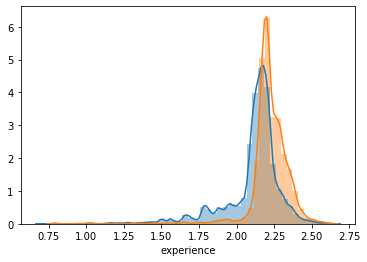

In [83]:
sns.distplot(np.log10(2+df[df["outcome"]==0]["experience"]))
sns.distplot(np.log10(2+df[df["outcome"]==1]["experience"]))

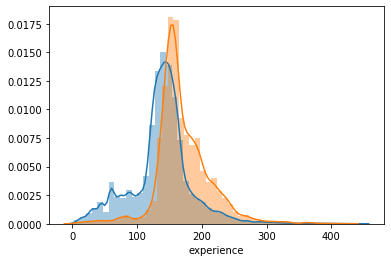

In [84]:
sns.distplot(df[df["outcome"]==0]["experience"])
sns.distplot(df[df["outcome"]==1]["experience"])

In [85]:
df.drop("experience",axis=1,inplace=True)

In [86]:
df

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,...,country,outcome,bin_workclass,bin_education,bin_marital_status,occupation_flag,realtionship_bin,bin_race,country_flag,age_bin
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,0,gov,BnM,Unhappy,0,not_HnW,White,1,Between_35_and_62
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,0,Self-emp-not-inc,BnM,happy,1,HnW,White,1,Between_35_and_62
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,0,Private,Assoc,Unhappy,0,not_HnW,White,1,Between_35_and_62
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,0,Private,School,happy,0,HnW,Black,1,Between_35_and_62
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,0,Private,BnM,happy,1,HnW,Black,1,under_35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,United-States,0,Private,Assoc,happy,1,HnW,White,1,under_35
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,United-States,1,Private,Assoc,happy,0,HnW,White,1,Between_35_and_62
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,United-States,0,Private,Assoc,Unhappy,0,not_HnW,White,1,Between_35_and_62
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,United-States,0,Private,Assoc,Unhappy,0,not_HnW,White,1,under_35


# Age occupation analysis

In [87]:
pd.set_option('display.max_columns', 500)
pd.crosstab(pd.cut(df["age"],9),df["bin_workclass"]).transpose()

age,"(16.927, 25.111]","(25.111, 33.222]","(33.222, 41.333]","(41.333, 49.444]","(49.444, 57.556]","(57.556, 65.667]","(65.667, 73.778]","(73.778, 81.889]","(81.889, 90.0]"
bin_workclass,,,,,,,,,
Private,5097,5190,4838,3610,2284,1211,340,86,40
Self-emp-inc,49,128,237,289,215,119,53,20,6
Self-emp-not-inc,131,397,573,541,422,290,121,56,10
gov,460,813,961,1024,651,325,90,20,7
others,674,224,154,109,125,262,217,76,16


# Age capital gain analysis

In [88]:
df=df[df["capital gain"]!=99999]
pd.set_option('display.max_columns', 500)
pd.crosstab(pd.cut(df["age"],9),[pd.cut(df["capital gain"],15),df["bin_race"]]).transpose()

age                          (16.927, 25.111]  (25.111, 33.222]  \
capital gain       bin_race                                       
(-41.31, 2754.0]   Asian                  186               241   
                   Black                  595               690   
                   White                 5410              5302   
                   others                 127               170   
(2754.0, 5508.0]   Asian                    1                 4   
                   Black                    4                12   
                   White                   55               163   
                   others                   1                 1   
(5508.0, 8262.0]   Asian                    0                 2   
                   Black                    0                 0   
                   White                    9                69   
                   others                   1                 1   
(8262.0, 11016.0]  Asian                    1                 0   
                   Black                    0                 1   
                   White                    4                21   
(11016.0, 13770.0] Asian                    0                 1   
                   Black                    1                 0   
                   White                    2                 8   
                   others                   0                 1   
(13770.0, 16524.0] Asian                    1                 2   
                   Black                    0                 6   
                   White                    2                34   
                   others                   1                 1   
(16524.0, 19278.0] White                    0                 0   
(19278.0, 22032.0] Black                    0                 0   
                   White                    0                 0   
(22032.0, 24786.0] White                    0                 0   
(24786.0, 27540.0] Black                    0                 0   
                   White                    0                 1   
(27540.0, 30294.0] Asian                    0                 0   
                   Black                    0                 0   
                   White                    2                 2   
                   others                   0                 0   
(33048.0, 35802.0] Black                    1                 0   
                   White                    3                 0   
(38556.0, 41310.0] White                    0                 1   

age                          (33.222, 41.333]  (41.333, 49.444]  \
capital gain       bin_race                                       
(-41.31, 2754.0]   Asian                  206               168   
                   Black                  633               512   
                   White                 5232              4263   
                   others                  93                83   
(2754.0, 5508.0]   Asian                   12                 5   
                   Black                   13                13   
                   White                  189               151   
                   others                   4                 4   
(5508.0, 8262.0]   Asian                    8                 2   
                   Black                   11                15   
                   White                  181               132   
                   others                   7                 1   
(8262.0, 11016.0]  Asian                    1                 1   
                   Black                    3                 5   
                   White                   21                22   
(11016.0, 13770.0] Asian                    1                 0   
                   Black                    2                 0   
                   White                    6                 3   
                   others                   0                 0   
(13770.0, 16524.0] Asian                    3 

# Capital Gain and outcome analysis

In [89]:
pd.crosstab([df["outcome"],df["bin_education"]],pd.cut(df["capital gain"]-df["capital_loss"],20))

col_0                  (-4401.666, -2072.7]  (-2072.7, 210.6]  \
outcome bin_education                                           
0       Assoc                            67             15810   
        BnM                              14              3701   
        Prof.                             2               241   
        School                           19              3837   
1       Assoc                            42              2953   
        BnM                              60              2396   
        Prof.                            34               487   
        School                            6               186   

col_0                  (210.6, 2493.9]  (2493.9, 4777.2]  (4777.2, 7060.5]  \
outcome bin_education                                                        
0       Assoc                      209               362                90   
        BnM                         50                81                50   
        Prof.                        6                10                 1   
        School                      61                80                 9   
1       Assoc                        0                98                77   
        BnM                          0                44                49   
        Prof.                        0                 3                 9   
        School                       0                 6                12   

col_0                  (7060.5, 9343.8]  (9343.8, 11627.1]  \
outcome bin_education                                        
0       Assoc                         6                  4   
        BnM                           0                  1   
        Prof.                         0                  0   
        School                        0                  1   
1       Assoc                       288                 31   
        BnM                         263                 41   
        Prof.                        27                  6   
        School                       19                  3   

col_0                  (11627.1, 13910.4]  (13910.4, 16193.7]  \
outcome bin_education                                           
0       Assoc                           0                   0   
        BnM                             0                   0   
        Prof.                           0                   0   
        School                          0                   0   
1       Assoc                          10                 128   
        BnM                            16                 214   
        Prof.                           1                  78   
        School                          2                   5   

col_0                  (18477.0, 20760.3]  (20760.3, 23043.6]  \
outcome bin_education                                           
0       Assoc                           0                   1   
        BnM                             0                   0   
        Prof.                           0                   0   
        School                          0                   0   
1       Assoc                          12                   0   
        BnM                            13                   0   
        Prof.                          12                   0   
        School                          2                   0   

col_0                  (23043.6, 25326.9]  (27610.2, 29893.5]  \
outcome bin_education                                           
0       Assoc                           0                   0   
        BnM                             0                   0   
        Prof.                           0                   0   
        School                          0                   0   
1       Assoc                           4                   6   
        BnM                             4                  21   
        Prof.                           7                   7   
        School                          0                   

# Defining a New Fetaure Net Capital

In [90]:
df["net_capital"]=0
df["net_capital"]=df["capital gain"]-df["capital_loss"]

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Age outcome analysis

In [91]:
pd.crosstab(df["outcome"],[pd.cut(df["age"],9),pd.cut(df["hours_per_week"],5)],normalize='columns').transpose()

outcome                                 0         1
age              hours_per_week                    
(16.927, 25.111] (0.902, 20.6]   1.000000  0.000000
                 (20.6, 40.2]    0.985909  0.014091
                 (40.2, 59.8]    0.942278  0.057722
                 (59.8, 79.4]    0.930380  0.069620
                 (79.4, 99.0]    0.892857  0.107143
(25.111, 33.222] (0.902, 20.6]   0.940972  0.059028
                 (20.6, 40.2]    0.880639  0.119361
                 (40.2, 59.8]    0.736103  0.263897
                 (59.8, 79.4]    0.714286  0.285714
                 (79.4, 99.0]    0.740260  0.259740
(33.222, 41.333] (0.902, 20.6]   0.823789  0.176211
                 (20.6, 40.2]    0.768714  0.231286
                 (40.2, 59.8]    0.540993  0.459007
                 (59.8, 79.4]    0.567657  0.432343
                 (79.4, 99.0]    0.569767  0.430233
(41.333, 49.444] (0.902, 20.6]   0.858065  0.141935
                 (20.6, 40.2]    0.691662  0.308338
                 (40.2, 59.8]    0.494936  0.505064
                 (59.8, 79.4]    0.498978  0.501022
                 (79.4, 99.0]    0.617647  0.382353
(49.444, 57.556] (0.902, 20.6]   0.829787  0.170213
                 (20.6, 40.2]    0.678556  0.321444
                 (40.2, 59.8]    0.464045  0.535955
                 (59.8, 79.4]    0.487097  0.512903
                 (79.4, 99.0]    0.511111  0.488889
(57.556, 65.667] (0.902, 20.6]   0.851711  0.148289
                 (20.6, 40.2]    0.735209  0.264791
                 (40.2, 59.8]    0.537084  0.462916
                 (59.8, 79.4]    0.488372  0.511628
                 (79.4, 99.0]    0.708333  0.291667
(65.667, 73.778] (0.902, 20.6]   0.886986  0.113014
                 (20.6, 40.2]    0.790123  0.209877
                 (40.2, 59.8]    0.524390  0.475610
                 (59.8, 79.4]    0.620690  0.379310
                 (79.4, 99.0]    0.875000  0.125000
(73.778, 81.889] (0.902, 20.6]   0.881481  0.118519
                 (20.6, 40.2]    0.782178  0.217822
                 (40.2, 59.8]    0.500000  0.500000
                 (59.8, 79.4]    1.000000  0.000000
(81.889, 90.0]   (0.902, 20.6]   0.967742  0.032258
                 (20.6, 40.2]    0.882353  0.117647
                 (40.2, 59.8]    0.600000  0.400000
                 (59.8, 79.4]    0.333333  0.666667
                 (79.4, 99.0]    1.000000  0.000000

In [92]:
df["age_and_work_ex"]=0
df.loc[((33.2<df["age"]) & (df["age"]<=41.3)) & ((40.2<df["hours_per_week"]) & (df["hours_per_week"] <=59.8)) ,"age_and_work_ex"]=1
df.loc[((33.2<df["age"]) & (df["age"]<=41.3)) & ((59.8<df["hours_per_week"]) & (df["hours_per_week"] <=79.4)) ,"age_and_work_ex"]=1
df.loc[((33.2<df["age"]) & (df["age"]<=41.3)) & ((79.4<df["hours_per_week"]) & (df["hours_per_week"] <=99.0)) ,"age_and_work_ex"]=1

df.loc[((41.3<df["age"]) & (df["age"]<=49.4)) & ((20.6<df["hours_per_week"]) & (df["hours_per_week"] <=40.2)) ,"age_and_work_ex"]=1
df.loc[((41.3<df["age"]) & (df["age"]<=49.4)) & ((40.2<df["hours_per_week"]) & (df["hours_per_week"] <=59.8)) ,"age_and_work_ex"]=1
df.loc[((41.3<df["age"]) & (df["age"]<=49.4)) & ((59.8<df["hours_per_week"]) & (df["hours_per_week"] <=79.4)) ,"age_and_work_ex"]=1
df.loc[((41.3<df["age"]) & (df["age"]<=49.4)) & ((79.4<df["hours_per_week"]) & (df["hours_per_week"] <=99.0)) ,"age_and_work_ex"]=1

df.loc[((49.4<df["age"]) & (df["age"]<=57.5)) & ((20.6<df["hours_per_week"]) & (df["hours_per_week"] <=40.2)) ,"age_and_work_ex"]=1
df.loc[((49.4<df["age"]) & (df["age"]<=57.5)) & ((40.2<df["hours_per_week"]) & (df["hours_per_week"] <=59.8)) ,"age_and_work_ex"]=1
df.loc[((49.4<df["age"]) & (df["age"]<=57.5)) & ((59.8<df["hours_per_week"]) & (df["hours_per_week"] <=79.4)) ,"age_and_work_ex"]=1
df.loc[((49.4<df["age"]) & (df["age"]<=57.5)) & ((79.4<df["hours_per_week"]) & (df["hours_per_week"] <=99.0)) ,"age_and_work_ex"]=1

df.loc[((57.54<df["age"]) & (df["age"]<=65.6)) & ((40.2<df["hours_per_week"]) & (df["hours_per_week"] <=59.8)) ,"age_and_work_ex"]=1
df.loc[((57.54<df["age"]) & (df["age"]<=65.6)) & ((59.8<df["hours_per_week"]) & (df["hours_per_week"] <=79.4)) ,"age_and_work_ex"]=1

df.loc[((65.64<df["age"]) & (df["age"]<=73.7)) & ((40.2<df["hours_per_week"]) & (df["hours_per_week"] <=59.8)) ,"age_and_work_ex"]=1
df.loc[((65.64<df["age"]) & (df["age"]<=73.7)) & ((59.8<df["hours_per_week"]) & (df["hours_per_week"] <=79.4)) ,"age_and_work_ex"]=1

df.loc[((73.7<df["age"]) & (df["age"]<=81.8)) & ((40.2<df["hours_per_week"]) & (df["hours_per_week"] <=59.8)) ,"age_and_work_ex"]=1

df.loc[((81.8<df["age"]) & (df["age"]<=90)) & ((40.2<df["hours_per_week"]) & (df["hours_per_week"] <=59.8)) ,"age_and_work_ex"]=1
df.loc[((81.8<df["age"]) & (df["age"]<=90)) & ((59.8<df["hours_per_week"]) & (df["hours_per_week"] <=79.4)) ,"age_and_work_ex"]=1

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ayush\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [93]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital gain', 'capital_loss', 'hours_per_week', 'country', 'outcome',
       'bin_workclass', 'bin_education', 'bin_marital_status',
       'occupation_flag', 'realtionship_bin', 'bin_race', 'country_flag',
       'age_bin', 'net_capital', 'age_and_work_ex'],
      dtype='object')

In [94]:
new_df=pd.get_dummies(df,columns=['marital_status','relationship','sex','bin_workclass','bin_education','bin_marital_status','occupation_flag','realtionship_bin','bin_race','age_bin'])
new_df=new_df.drop(columns=['age','workclass','fnlwgt','education-num','education','occupation','race','capital gain','capital_loss','country','country_flag','age_and_work_ex'])
new_df.head()

,hours_per_week,outcome,net_capital,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,sex_Male,bin_workclass_Private,bin_workclass_Self-emp-inc,bin_workclass_Self-emp-not-inc,bin_workclass_gov,bin_workclass_others,bin_education_Assoc,bin_education_BnM,bin_education_Prof.,bin_education_School,bin_marital_status_Unhappy,bin_marital_status_happy,occupation_flag_0,occupation_flag_1,realtionship_bin_HnW,realtionship_bin_not_HnW,bin_race_Asian,bin_race_Black,bin_race_White,bin_race_others,age_bin_Between_35_and_62,age_bin_over_62,age_bin_under_35
0,40,0,2174,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0
2,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
3,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0
4,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1


# MarkDown

In [95]:
corr = new_df.corr()
corr.style.background_gradient(cmap='coolwarm')

# Reducing Dimension

In [96]:
temp_df=new_df.drop(columns=['outcome'])
temp_df=temp_df-temp_df.mean()
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(temp_df)
pca_df=pd.DataFrame(pca.transform(temp_df))
t_df=pca_df.reset_index()
pca_df

,0,1,2,3,4,5,6,7,8,9
0,1669.500543,-0.981625,0.994922,0.380420,0.211562,-1.504846,0.660517,0.655335,-0.259904,-0.055605
1,-504.508436,-27.147612,-2.480932,1.382473,-0.318995,-0.647642,0.114331,0.310825,-0.065032,-0.143384
2,-504.499349,-0.228565,0.851387,-0.186025,1.008849,-1.022204,-0.639569,-0.369962,-0.469316,0.229107
3,-504.499238,-0.182251,-1.541188,-0.394199,0.481563,-0.460151,0.853183,-0.618591,1.004524,0.675863
4,-504.499240,-0.205818,-0.703053,0.911605,-0.658715,1.585499,0.886783,-0.399571,0.541537,1.021546
...,...,...,...,...,...,...,...,...,...,...
32397,-504.499953,-2.206890,-0.769213,0.360206,-0.366057,1.842424,-0.242292,-0.176354,-0.375659,0.105510
32398,-504.499241,-0.177868,-1.580304,-0.596081,0.590306,-0.163692,-0.312015,-0.336706,-0.019355,-0.141043
32399,-504.499367,-0.249326,1.020505,0.012869,1.423979,0.404118,-0.045291,-0.353224,0.099277,-0.427514
32400,-504.506271,-20.247756,0.653299,-0.959679,-0.641212,-0.380385,-0.457836,-0.047190,0.264054,-0.518671


# Standardizing Data

In [97]:
"""
from sklearn.preprocessing import MinMaxScaler
std=MinMaxScaler()
std.fit(pca_df)
t_df=std.transform(pca_df)
t_df=pd.DataFrame(t_df)
t_df.head() """

'\nfrom sklearn.preprocessing import MinMaxScaler\nstd=MinMaxScaler()\nstd.fit(pca_df)\nt_df=std.transform(pca_df)\nt_df=pd.DataFrame(t_df)\nt_df.head() '

In [98]:
def ROS(train_df,r=1):
    
    print("calling_ROS")
    
    train_df_0=train_df[train_df['outcome']==0]
    train_df_1=train_df[train_df['outcome']==1]
    
    train_df_1_over=train_df_1.sample(round(r*len(train_df_0)),replace=True,random_state=1)
    
    df_=pd.concat([train_df_1_over,train_df_0])
                                       
    print("exiting_ROS")
    
    return df_

def RUS(train_df,r=1):
    
    print("calling_RUS")
    
    train_df_0=train_df[train_df['outcome']==0]
    train_df_1=train_df[train_df['outcome']==1]
    
    train_df_0_under=train_df_0.sample(round(len(train_df_1)/r),replace=True,random_state=1)
    
    df_=pd.concat([train_df_0_under,train_df_1])
     
    print("exiting_RUS")    
    
    return df_

def SMOTE_(train_df,r=1):
    
    len_=len(train_df[train_df['outcome']==0])
    
    sm=SMOTE(sampling_strategy=(len_*r)/len_,random_state=42)
    a,b=sm.fit_resample(train_x,train_y)         
    
    col=train_df.drop(columns=['outcome']).columns
    df_=pd.concat([pd.DataFrame(a,columns=col),pd.DataFrame(b,columns=['outcome'])],sort=False,axis=1)        
             
    return df_

def ADASYN_(train_df,r=1):
    
    len_=len(train_df[train_df['outcome']==0])
    
    sm=ADASYN(sampling_strategy=(len_*r)/len_,random_state=42)
    a,b=sm.fit_resample(train_x,train_y)         
    
    col=train_df.drop(columns=['outcome']).columns
    df_=pd.concat([pd.DataFrame(a,columns=col),pd.DataFrame(b,columns=['outcome'])],sort=False,axis=1)        
             
    return df_

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer,f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score

score_f1=make_scorer(f1_score)

def clf_(train_df,param,clf,split,score):
    
    print("calling_clf")
    
    col=train_df.drop(columns=['outcome']).columns
    
    cv=StratifiedKFold(n_splits=split,random_state=345)
    grid=GridSearchCV(estimator=clf,param_grid=param,cv=cv.split(train_df[col],train_df['outcome']),scoring=score,n_jobs=-1)
    
    grid.fit(train_df[col],train_df['outcome'])
    
    print("######Best Param######",grid.best_params_,"##########BEST F1 Score#######",grid.best_score_)
    
    clf_best=grid.best_estimator_
    
    print("exiting_clf")
    
    return clf_best


def execute(train_df,test_df,param,clf,split,score):
    
        print("calling_execute")
        
        col=train_df.drop(columns=['outcome']).columns
    
        clf=clf_(train_df,param,clf,split,score)
        clf_fit=clf.fit(train_df[col],train_df['outcome'])
        
        pred=clf_fit.predict(test_df[col])
        
        plot_confusion_matrix(clf_fit,test_df[col],test_df['outcome'])
        plot_precision_recall_curve(clf_fit,test_df[col],test_df['outcome'])
        
        print("##### Accuracy is #### ",accuracy_score(test_df['outcome'],pred))
        
        f1_score(test_df['outcome'], pred, average='weighted')
        
        prob_test = clf_fit.predict_proba(test_df[col])[:, 1]
        roc_value_test = roc_auc_score(test_df['outcome'], prob_test)
        print("#####ROC SCORE####",roc_value_test)
        
        print("exiting_execute")
        
        return clf_fit
        

In [100]:
from sklearn.model_selection import train_test_split
x=t_df
x=x.drop(columns=['index'])
y=new_df['outcome']
y=y.reset_index()
y=y.drop(columns=['index'])

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'log2', 'min_samples_split': 30, 'n_estimators': 700} ##########BEST F1 Score####### 0.8613000064420113
exiting_clf
##### Accuracy is ####  0.8177750347168646
#####ROC SCORE#### 0.9024638080529254
exiting_execute
############### Time taken is ############### 2040.0766389369965


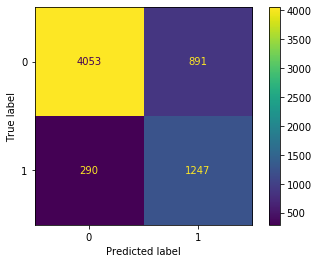

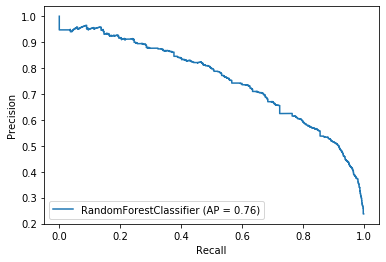

In [101]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[300,500,700],"max_features":['sqrt','auto','log2'],"min_samples_split":[30,40,50,60,70]}

df_=ROS(train_df,r=1)

execute(df_,test_df,param,clf,5,score_f1)
print("############### Time taken is ###############",time.time()-start_time)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'sqrt', 'min_samples_split': 30, 'n_estimators': 300} ##########BEST F1 Score####### 0.8076738662838888
exiting_clf
##### Accuracy is ####  0.8443141490510724
#####ROC SCORE#### 0.9036841117589217
exiting_execute
############### Time taken is ############### 1651.7260522842407


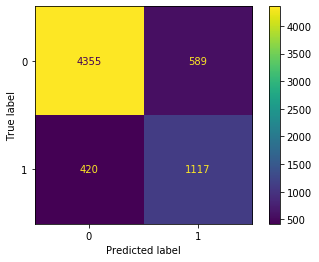

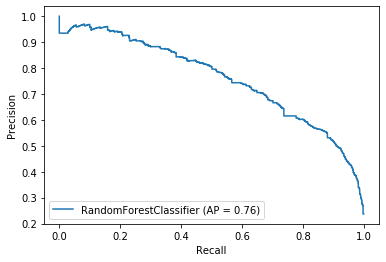

In [102]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[300,500,700],"max_features":['sqrt','auto','log2'],"min_samples_split":[30,40,50,60,70]}

df_=ROS(train_df,r=2/3)

execute(df_,test_df,param,clf,5,score_f1)
print("############### Time taken is ###############",time.time()-start_time)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'log2', 'min_samples_split': 30, 'n_estimators': 700} ##########BEST F1 Score####### 0.7516771184580016
exiting_clf
##### Accuracy is ####  0.8546520598673044
#####ROC SCORE#### 0.9037131290097762
exiting_execute
############### Time taken is ############### 1047.8344721794128


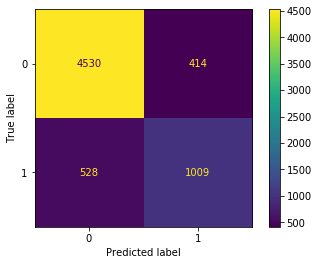

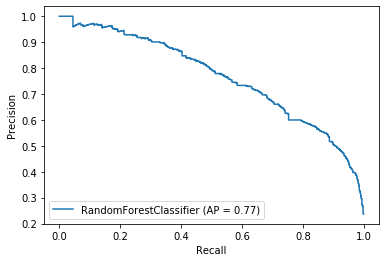

In [103]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[300,500,700],"max_features":['sqrt','auto','log2'],"min_samples_split":[30,40,50,60,70]}

df_=ROS(train_df,r=3/7)

execute(df_,test_df,param,clf,5,score_f1)
print("############### Time taken is ###############",time.time()-start_time)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'auto', 'min_samples_split': 30, 'n_estimators': 700} ##########BEST F1 Score####### 0.6621040103893203
exiting_clf
##### Accuracy is ####  0.8523376022218794
#####ROC SCORE#### 0.9015032778307677
exiting_execute
############### Time taken is ############### 938.6295335292816


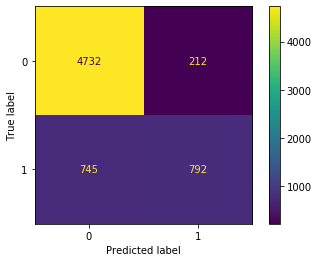

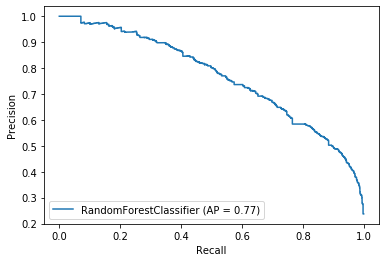

In [104]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[300,500,700],"max_features":['sqrt','auto','log2'],"min_samples_split":[30,40,50,60,70]}

df_=ROS(train_df,r=2/8)

execute(df_,test_df,param,clf,5,score_f1)
print("############### Time taken is ###############",time.time()-start_time)

In [ ]:
start_time=time.time()
clf=RandomForestClassifier()
param={"n_estimators":[300,500,700],"max_features":['sqrt','auto','log2'],"min_samples_split":[30,40,50,60,70]}

df_=ROS(train_df,r=1/9)

execute(df_,test_df,param,clf,5,score_f1)
print("############### Time taken is ###############",time.time()-start_time)

# Logistic Regression

In [106]:
#Applying min max scalar on Continuous variable
from sklearn.preprocessing import MinMaxScaler
score_lr=make_scorer("log_loss")



scaler=MinMaxScaler()
data=scaler.fit_transform(x)

df_lr=pd.concat([pd.DataFrame(data),y],axis=1)
df_lr.head()

,0,1,2,3,4,5,6,7,8,9,outcome
0,0.142995,0.441963,0.630805,0.575601,0.534125,0.059006,0.645484,0.677891,0.314366,0.435678,0
1,0.095388,0.201106,0.048219,0.815404,0.379796,0.282355,0.468843,0.517225,0.381549,0.404284,0
2,0.095388,0.448895,0.606747,0.440043,0.766041,0.184761,0.225027,0.199733,0.242170,0.537504,0
3,0.095388,0.449321,0.205729,0.390225,0.612663,0.331206,0.707793,0.083783,0.750282,0.697285,0
4,0.095388,0.449104,0.346208,0.702720,0.280977,0.864210,0.718660,0.185925,0.590665,0.820918,0


In [108]:
x=df_lr.drop(columns=['outcome'])
y=df_lr['outcome']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 0.1, 'penalty': 'l2'} ##########BEST F1 Score####### 0.7983941230939304
exiting_clf
##### Accuracy is ####  0.7754976083937664
#####ROC SCORE#### 0.8800264326757669
exiting_execute
############### Time taken is ############### 1.8219053745269775


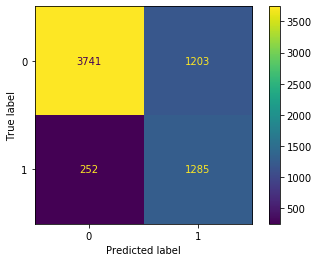

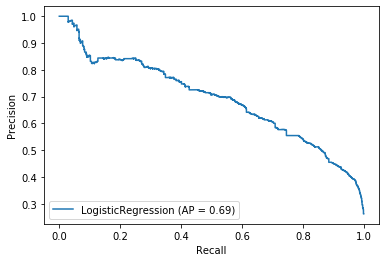

In [109]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)

start_time=time.time()

param={'C': [0.01, 0.1, 1, 10, 100, 1000,10000] ,'penalty':['l1','l2','elasticnet']}

df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

print("############### Time taken is ###############",time.time()-start_time)

calling_RUS
exiting_RUS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 10, 'penalty': 'l2'} ##########BEST F1 Score####### 0.7986723767871775
exiting_clf
##### Accuracy is ####  0.7792007406264465
#####ROC SCORE#### 0.8828219585709984
exiting_execute
############### Time taken is ############### 0.6547372341156006


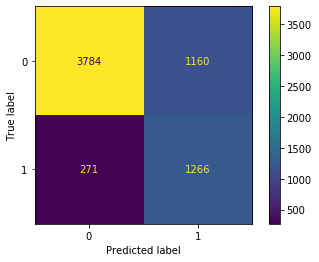

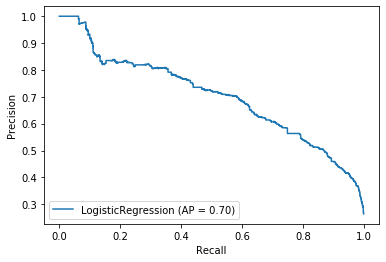

In [110]:
#Trying RUS for Sampling

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)

start_time=time.time()

param={'C': [0.01, 0.1, 1, 10, 100, 1000,10000] ,'penalty':['l1','l2','elasticnet']}

df_=RUS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

print("############### Time taken is ###############",time.time()-start_time)

In [112]:
# Standardizing continuous variable
from sklearn import preprocessing
    

data=preprocessing.scale(x)

#New Data Set 
df_lr=pd.concat([pd.DataFrame(data),y],axis=1)
df_lr.head()    

,0,1,2,3,4,5,6,7,8,9,outcome
0,0.639202,-0.079792,0.764531,0.500294,0.300748,-2.567747,1.226786,1.260647,-0.580975,-0.131769,0
1,-0.193161,-2.206716,-1.906432,1.818103,-0.453472,-1.105084,0.212348,0.597924,-0.145369,-0.339780,0
2,-0.193158,-0.018579,0.654234,-0.244644,1.434143,-1.744206,-1.187879,-0.711684,-1.049085,0.542921,0
3,-0.193158,-0.014814,-1.184301,-0.518415,0.684572,-0.785165,1.584627,-1.189964,2.245461,1.601610,0
4,-0.193158,-0.016730,-0.540250,1.198861,-0.936406,2.705366,1.647033,-0.768641,1.210524,2.420784,0


calling_RUS
exiting_RUS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 10, 'penalty': 'l2'} ##########BEST F1 Score####### 0.7986723767871775
exiting_clf
##### Accuracy is ####  0.7792007406264465
#####ROC SCORE#### 0.8828219585709984
exiting_execute
############### Time taken is ############### 0.6498379707336426


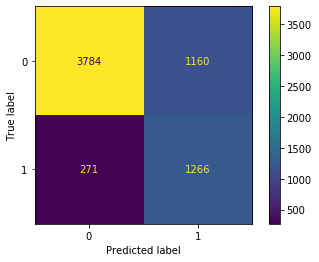

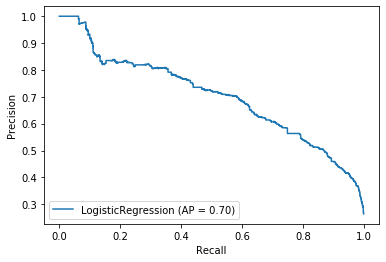

In [114]:
#Trying RUS for Sampling

from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(max_iter=10000)

start_time=time.time()

param={'C': [0.01, 0.1, 1, 10, 100, 1000,10000] ,'penalty':['l1','l2','elasticnet']}

df_=RUS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

print("############### Time taken is ###############",time.time()-start_time)

# SVM

In [116]:
df_svm=df_lr #Min Max scaled Data Frame

x=df_svm.drop(columns=['outcome'])
y=df_svm['outcome']

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

train_df=pd.concat([train_x,train_y],axis=1,sort=False)
test_df=pd.concat([test_x,test_y],axis=1,sort=False)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'C': 1000} ##########BEST F1 Score####### 0.8465759607463399
exiting_clf
##### Accuracy is ####  0.7958648356735072


AttributeError: predict_proba is not available when  probability=False

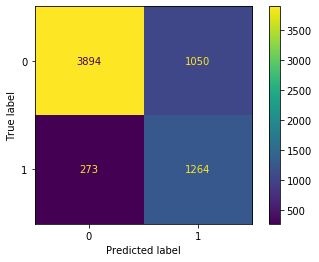

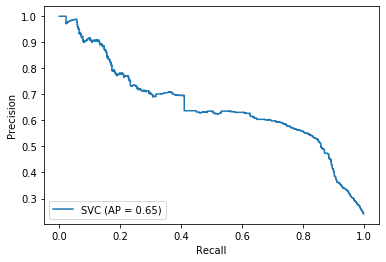

In [119]:
from sklearn.svm import SVC
clf=SVC()

start_time=time.time()

param={"C":[.001,.01,.1,1,10,100,1000]}
#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)


print("############### Time taken is ###############",time.time()-start_time)

In [ ]:
from sklearn.svm import SVC
clf=SVC()

start_time=time.time()

param={"C":[.001,.01,.1,1,10,100,1000],"gamma":[1,2,3]}
#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)


print("############### Time taken is ###############",time.time()-start_time)

In [ ]:
from sklearn.svm import SVC
clf=SVC()

start_time=time.time()

param={"C":[.001,.01,.1,1,10,100,1000],"gamma":[1,2,3]}
#RUS
df_=RUS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)


print("############### Time taken is ###############",time.time()-start_time)

# Gradient Boosting

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 700} ##########BEST F1 Score####### 0.8571241498861785
exiting_clf
##### Accuracy is ####  0.8203980867150131
#####ROC SCORE#### 0.9160367093884823
exiting_execute


GradientBoostingClassifier(n_estimators=700)

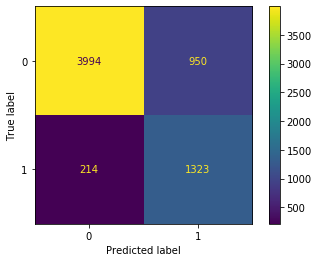

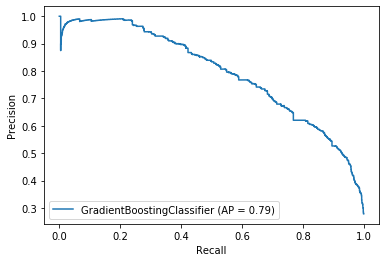

In [120]:
#Tuning for N_estimators

from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()

start_time=time.time()

param={'loss':['deviance', 'exponential'],'n_estimators':[100,200,300,400,500,600,700],'learning_rate':[.1]}

#RUS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'loss': 'deviance', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 700} ##########BEST F1 Score####### 0.8580496487054727
exiting_clf
##### Accuracy is ####  0.8173121431877797
#####ROC SCORE#### 0.9155095955640058
exiting_execute


GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=8,
                           n_estimators=700)

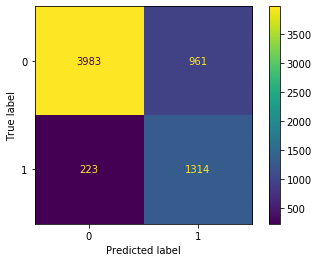

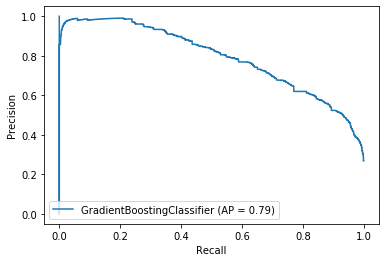

In [122]:
#Fixing learning Rate and number of estimators and optimizing  min sample split and min_sample_leaf 

from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()

start_time=time.time()

param={'loss':['deviance'],'n_estimators':[700],'min_samples_split':[4,8,16,32,40],'min_samples_leaf':[2,4,6,8,10,12,14,16,18,20]}

#RUS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'learning_rate': 0.03, 'loss': 'deviance', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 700} ##########BEST F1 Score####### 0.8425288344872189
exiting_clf
##### Accuracy is ####  0.8194723036568431
#####ROC SCORE#### 0.9169588131378531
exiting_execute
#############Time taken is  -216.6953136920929  ###############


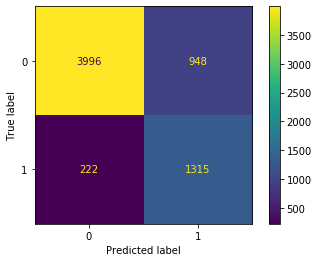

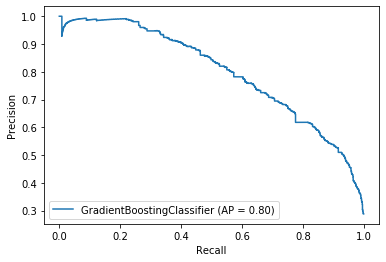

In [123]:
#Tuning Learning Rate

from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()

start_time=time.time()

param={'loss':['deviance'],'n_estimators':[700],'min_samples_split':[8],'min_samples_leaf':[2],'learning_rate':[.02,.03]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)
print("#############Time taken is ",start_time-time.time()," ###############")

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'learning_rate': 0.03, 'loss': 'deviance', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 300, 'subsample': 1} ##########BEST F1 Score####### 0.8358644634221856
exiting_clf
##### Accuracy is ####  0.8122203363678445
#####ROC SCORE#### 0.9139004212173085
exiting_execute
#############Time taken is  143.3470652103424  ###############


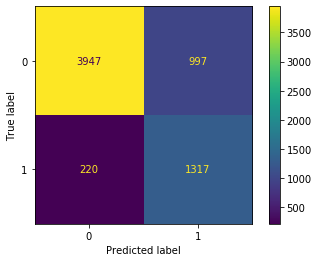

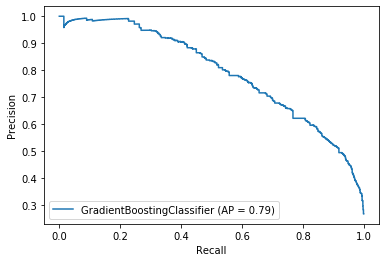

In [124]:
#Tuning Subsample

from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier()

start_time=time.time()

param={'loss':['deviance'],'n_estimators':[300],'min_samples_split':[8],'min_samples_leaf':[2],'learning_rate':[.03],'subsample':[1,.9,.8,.7,.6]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)
print("#############Time taken is ",-start_time+time.time()," ###############")

# Decision Tree

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2} ##########BEST F1 Score####### 0.856392799440678
exiting_clf
##### Accuracy is ####  0.8024996142570591
#####ROC SCORE#### 0.8457062627781181
exiting_execute


DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=2)

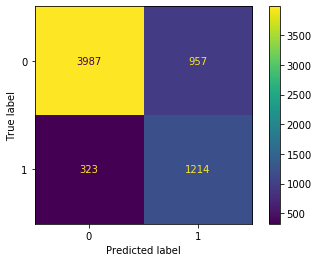

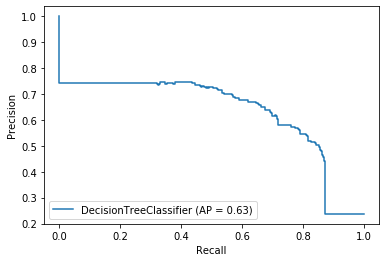

In [125]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

start_time=time.time()

param={'min_samples_split':[2,4,8,16,32,50],'min_samples_leaf':[2,3,4,5,6,7],'max_features':['None', 'sqrt', 'log2']}


#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'max_features': 'log2', 'max_leaf_nodes': 7, 'min_samples_leaf': 5, 'min_samples_split': 2} ##########BEST F1 Score####### 0.8012886727847495
exiting_clf
##### Accuracy is ####  0.7500385742940904
#####ROC SCORE#### 0.8642575636984585
exiting_execute


DecisionTreeClassifier(max_features='log2', max_leaf_nodes=7,
                       min_samples_leaf=5)

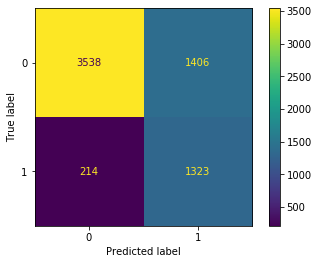

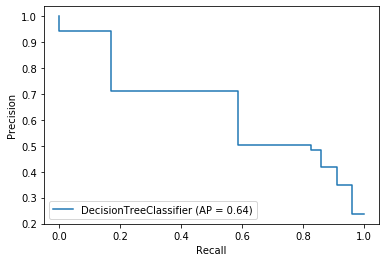

In [126]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

start_time=time.time()

param={'min_samples_split':[2,4,8,16,32,50],'min_samples_leaf':[2,3,4,5,6,7],'max_leaf_nodes':[2,3,4,5,6,7],'max_features':['None', 'sqrt', 'log2']}


#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

# XGBoost

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'eta': 0.1, 'n_estimators': 900} ##########BEST F1 Score####### 0.8580883023484696
exiting_clf
##### Accuracy is ####  0.8183922234223113
#####ROC SCORE#### 0.9167617458673119
exiting_execute


XGBClassifier(eta=0.1, n_estimators=900)

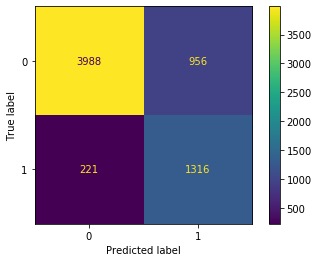

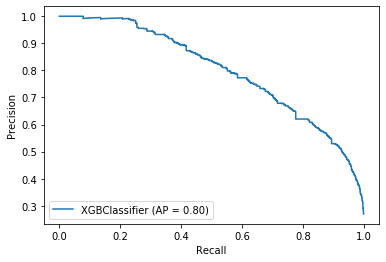

In [127]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[i for i in range(0,1000,100)]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'eta': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 900} ##########BEST F1 Score####### 0.8736816696497248
exiting_clf
##### Accuracy is ####  0.8205523838913747
#####ROC SCORE#### 0.9052041945916582
exiting_execute


XGBClassifier(eta=0.1, max_depth=9, n_estimators=900)

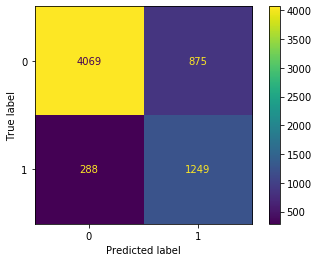

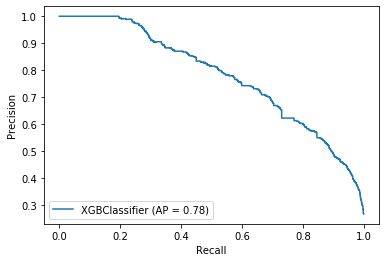

In [128]:
#Tuning for Tree based Parameter

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[900],'max_depth':range(3,10,2),'min_child_weight':range(1,12,2)}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'eta': 0.1, 'gamma': 0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 900} ##########BEST F1 Score####### 0.8736816696497248
exiting_clf
##### Accuracy is ####  0.8205523838913747
#####ROC SCORE#### 0.9052041945916582
exiting_execute


XGBClassifier(eta=0.1, max_depth=9, n_estimators=900)

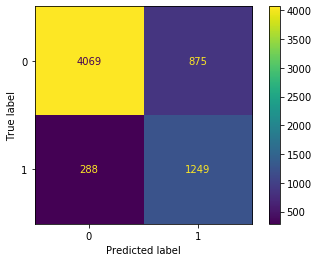

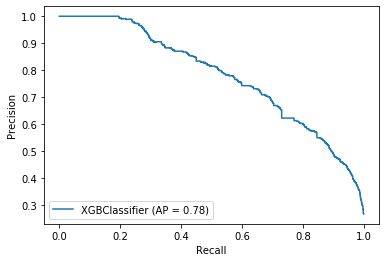

In [129]:
#Tuning for gamma

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[900],'max_depth':[9],'min_child_weight':[1],'gamma':[0,.2,.4,.6,.8,1]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'colsample_bytree': 0.4, 'eta': 0.1, 'gamma': 0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 900, 'subsample': 1} ##########BEST F1 Score####### 0.8747060744839674
exiting_clf
##### Accuracy is ####  0.8214781669495448
#####ROC SCORE#### 0.9065822837115972
exiting_execute


XGBClassifier(colsample_bytree=0.4, eta=0.1, max_depth=9, n_estimators=900)

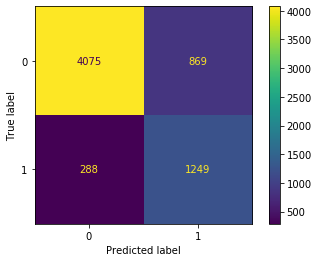

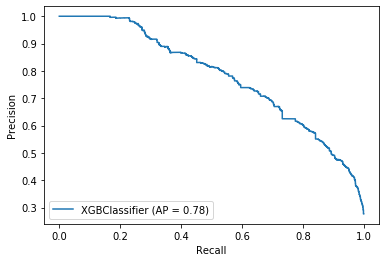

In [130]:
#Tuning for subsample and colsample_bytree

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[900],'max_depth':[9],'min_child_weight':[1],'gamma':[0],'subsample':[1,.8,.6,.4],'colsample_bytree':[1,.8,.6,.4]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'colsample_bytree': 0.4, 'eta': 0.1, 'gamma': 0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 900, 'reg_alpha': 0.01, 'subsample': 1} ##########BEST F1 Score####### 0.8746596079844304
exiting_clf
##### Accuracy is ####  0.8210152754204598
#####ROC SCORE#### 0.9065184589194687
exiting_execute


XGBClassifier(colsample_bytree=0.4, eta=0.1, max_depth=9, n_estimators=900,
              reg_alpha=0.01)

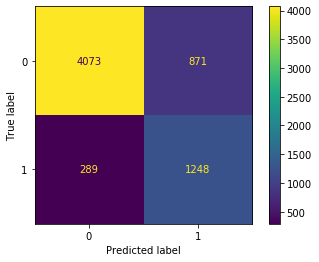

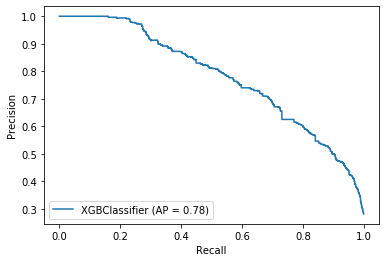

In [131]:
#Tuning Regularization param

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.1],'n_estimators':[900],'max_depth':[9],'min_child_weight':[1],'gamma':[0],'subsample':[1],'colsample_bytree':[.4],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

calling_ROS
exiting_ROS
calling_execute
calling_clf


C:\Users\ayush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


######Best Param###### {'colsample_bytree': 0.4, 'eta': 0.02, 'gamma': 0, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 900, 'reg_alpha': 0.01, 'subsample': 1} ##########BEST F1 Score####### 0.8746596079844304
exiting_clf
##### Accuracy is ####  0.8210152754204598
#####ROC SCORE#### 0.9065184589194687
exiting_execute


XGBClassifier(colsample_bytree=0.4, eta=0.02, max_depth=9, n_estimators=900,
              reg_alpha=0.01)

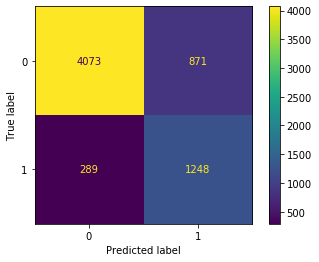

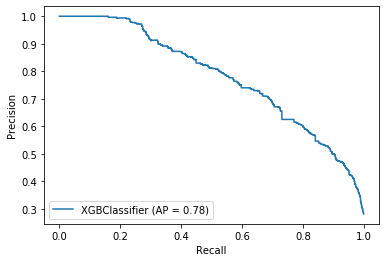

In [132]:
# tuning learning rate

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
clf=XGBClassifier(objective= 'binary:logistic')

start_time=time.time()
param={'eta':[.02,.04,.06,.08],'n_estimators':[900],'max_depth':[9],'min_child_weight':[1],'gamma':[0],'subsample':[1],'colsample_bytree':[.4],'reg_alpha':[1e-2]}

#ROS
df_=ROS(train_df,r=1)
execute(df_,test_df,param,clf,5,score_f1)

In [136]:
#XGB is the best classifier so far with accuracy 82% and F1 score of .87
#XGB has taken very less time in comaprison to Random Forest(2nd best)